## Bias y Fairness NYC 311

In [1]:
import pandas as pd
import pickle
import numpy as np
from aequitas.group import Group
from aequitas.plotting import Plot
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import seaborn as sns


In [2]:
with open('pickles/gini_depth_20_estimatros15_2020_1_22.pickle', 'rb') as f:
    model = pickle.load(f)

In [3]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [4]:
with open('pickles/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

In [5]:
with open('pickles/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    y_test = y_test.reset_index(drop = True)

In [6]:
y_pred = model.predict(X_test)

#### Formato de Input

In [7]:
X_test.head()

,date_holiday,number_cases_1_days_ago,number_cases_2_days_ago,number_cases_3_days_ago,number_cases_4_days_ago,number_cases_5_days_ago,number_cases_6_days_ago,number_cases_7_days_ago,number_cases_8_days_ago,number_cases_9_days_ago,...,woy_50,woy_51,woy_52,woy_53,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten island,borough_unspecified
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1,178,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,182,178,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,158,182,178,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,143,158,182,178,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
y_test

0        1
1        1
2        1
3        1
4        0
        ..
20213    1
20214    1
20215    1
20216    0
20217    0
Name: mean_flag, Length: 20218, dtype: int64

In [9]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [10]:
input_aequitas = X_test
input_aequitas['label_value'] = y_test
input_aequitas['score'] = y_pred

In [11]:
input_aequitas.head()

,date_holiday,number_cases_1_days_ago,number_cases_2_days_ago,number_cases_3_days_ago,number_cases_4_days_ago,number_cases_5_days_ago,number_cases_6_days_ago,number_cases_7_days_ago,number_cases_8_days_ago,number_cases_9_days_ago,...,woy_52,woy_53,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten island,borough_unspecified,label_value,score
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
1,1,178,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,1,182,178,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,1,158,182,178,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1,143,158,182,178,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [12]:
df1 = X_test[X_test.columns[-8:-2]]

In [13]:
df3=X_test[X_test.columns[-2:]]

In [14]:
df3

,label_value,score
0,1,1
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
20213,1,0
20214,1,0
20215,1,1
20216,0,0


In [15]:
df1

,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten island,borough_unspecified
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
20213,0,1,0,0,0,0
20214,0,0,1,0,0,0
20215,0,0,0,1,0,0
20216,0,0,0,0,1,0


In [16]:
cols = df1.columns.to_series().values
df1 = pd.DataFrame(np.repeat(cols[None, :], len(df1), 0)[df1.astype(bool).values], df1.index[df1.any(1)])

In [17]:
df1

,0
0,borough_bronx
1,borough_brooklyn
2,borough_manhattan
3,borough_queens
4,borough_staten island
...,...
20213,borough_brooklyn
20214,borough_manhattan
20215,borough_queens
20216,borough_staten island


In [18]:
df = pd.concat([df1, df3], axis=1, sort=False)

In [19]:
df.dtypes

0              object
label_value     int64
score           int64
dtype: object

In [20]:
df = df.rename(columns={0: 'borough'})

In [21]:
df.dtypes

borough        object
label_value     int64
score           int64
dtype: object

In [22]:
input_aequitas = df

In [23]:
input_aequitas.head()

,borough,label_value,score
0,borough_bronx,1,1
1,borough_brooklyn,1,0
2,borough_manhattan,1,0
3,borough_queens,1,0
4,borough_staten island,0,0


Cambiaremos los valores de la columna borough para facilitar la interpretación y asegurar de que sea considerada como una variable categórica en el reporte de Aequitas de la siguiente manera:
+ borough_bronx = A 
+ borough_brooklyn = B 
+ borough_manhattan = C 
+ borough_queens = D 
+ borough_staten island = E 
+ borough_unspecified  = F 

In [24]:
input_aequitas.loc[input_aequitas['borough'] == 'borough_bronx', 'borough'] = 'A'
input_aequitas.loc[input_aequitas['borough'] == 'borough_brooklyn', 'borough'] = 'B'
input_aequitas.loc[input_aequitas['borough'] == 'borough_manhattan', 'borough'] = 'C'
input_aequitas.loc[input_aequitas['borough'] == 'borough_queens', 'borough'] = 'D'
input_aequitas.loc[input_aequitas['borough'] == 'borough_staten island', 'borough'] = 'E'
input_aequitas.loc[input_aequitas['borough'] == 'borough_unspecified', 'borough'] = 'F'
input_aequitas

,borough,label_value,score
0,A,1,1
1,B,1,0
2,C,1,0
3,D,1,0
4,E,0,0
...,...,...,...
20213,B,1,0
20214,C,1,0
20215,D,1,1
20216,E,0,0


En la gráfica de barras dispuesta a continuación, hay una diferencia entre las  large difference in how these scores are distributed by race, with a majority of white and Hispanic people predicted as low risk (score = 0) and a majority of black people predicted high and medium risk (score = 1). We also see that while the majority of people in age categories over 25 are predicted as low risk (score = 0), the majority of people below 25 are predicted as high and medium risk (score = 1).

In [25]:
aq_palette = sns.diverging_palette(225, 35, n=2)

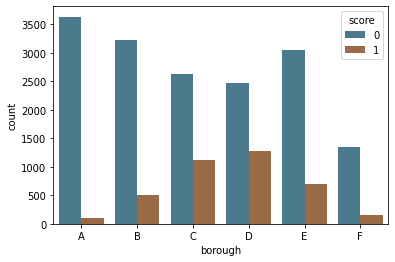

In [26]:
by_borough = sns.countplot(x="borough", hue="score", data=df, palette=aq_palette)

#### What is the distribution of groups, predicted scores, and labels across my dataset?

**Group Counts Calculated:**

Count Type -- Column Name 

False Positive Count -- ‘fp’\
False Negative Count -- ‘fn’\
True Negative Count -- ‘tn’\
True Positive Count -- ‘tp’\
Predicted Positive Count -- ‘pp’\
Predicted Negative Count -- ‘pn’\
Count of Negative Labels in Group -- ‘group_label_neg’\
Count of Positive Labels in Group -- ‘group_label_pos’\
Group Size -- ‘group_size’\
Total Entities -- ‘total_entities’

**Absolute Metrics Calculated:**

Metric -- Column Name

True Positive Rate -- ‘tpr’\
True Negative Rate -- ‘tnr’\
False Omission Rate -- ‘for’\
False Discovery Rate -- ‘fdr’\
False Positive Rate -- ‘fpr’\
False Negative Rate -- ‘fnr’\
Negative Predictive Value -- ‘npv’\
Precision -- ‘precision’\
Predicted Positive Ratio_k -- ‘ppr’\
Predicted Positive Ratio_g -- ‘pprev’\
Group Prevalence -- ‘prev’

Usamos el método "get_crosstabs()" que tabula una matrix de confusión para cada subgrupo y calcula métricas comúnmente usadas como _false positive rate_ y _false omission rate_. También provee conteos por grupo and prevalencia de grupos.

In [27]:
g = Group()
xtab, _ = g.get_crosstabs(input_aequitas) 

model_id, score_thresholds 1 {'rank_abs': [3871]}


/usr/local/lib/python3.7/site-packages/aequitas/group.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  divide = lambda x, y: x / y if y != 0 else pd.np.nan


Ahora podemos visualizar un dataframe de los conteos por grupo y las métricas de sesgo por grupo.

Usamos el método "list_absolute_metrics()" para ver solo los conteos o las metricas de sesgo.

**Conteos**

In [28]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [29]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,1,binary 0/1,3871,borough,A,109,3634,6,1655,1979,103,1758,1985,3743,20218
1,1,binary 0/1,3871,borough,B,514,3229,2,2108,1121,512,2620,1123,3743,20218
2,1,binary 0/1,3871,borough,C,1120,2623,32,1522,1101,1088,2610,1133,3743,20218
3,1,binary 0/1,3871,borough,D,1279,2464,332,242,2222,947,1189,2554,3743,20218
4,1,binary 0/1,3871,borough,E,690,3052,690,0,3052,0,0,3742,3742,20218
5,1,binary 0/1,3871,borough,F,159,1345,158,2,1343,1,3,1501,1504,20218


**Métricas de Sesgo**

In [30]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,borough,A,0.06,1.00,0.46,0.06,0.00,0.94,0.54,0.94,0.03,0.03,0.47
1,borough,B,0.20,1.00,0.65,0.00,0.00,0.80,0.35,1.00,0.13,0.14,0.70
2,borough,C,0.42,0.97,0.58,0.03,0.03,0.58,0.42,0.97,0.29,0.30,0.70
3,borough,D,0.80,0.87,0.10,0.26,0.13,0.20,0.90,0.74,0.33,0.34,0.32
4,borough,E,NaN,0.82,0.00,1.00,0.18,NaN,1.00,0.00,0.18,0.18,0.00
5,borough,F,0.33,0.89,0.00,0.99,0.11,0.67,1.00,0.01,0.04,0.11,0.00


Vemos que los distritos _D, E, F_  tienen false positive rates (fpr) de  13%, 18% y 11% respectivamente, mientras que los distritos _A, B, C_ tiene fpr de 0% o 3%. Esto significa que los distritos _D, E, F_ tienen más probabilidad de que sus predicciones sean falsamente etiquetadas por encima del promedio, en comparación con los otros distritos. Por otro lado, los false ommision rates (for) son muchísimo más similares entre los distritos _D, E, F_.

**Visualizando el sesgo en el modelo**

In [31]:
aqp = Plot()

**Visualizando una métrica absoluta a través de todos los grupos de población**

In [32]:
xtab_plot = xtab.dropna()
xtab_plot

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,1,binary 0/1,3871,borough,A,0.058589,0.996977,0.455421,0.055046,0.003023,...,0.029121,6,1655,1979,103,1758,1985,3743,20218,0.469677
1,1,binary 0/1,3871,borough,B,0.195420,0.998219,0.652834,0.003891,0.001781,...,0.137323,2,2108,1121,512,2620,1123,3743,20218,0.699973
2,1,binary 0/1,3871,borough,C,0.416858,0.971756,0.580252,0.028571,0.028244,...,0.299225,32,1522,1101,1088,2610,1133,3743,20218,0.697302
3,1,binary 0/1,3871,borough,D,0.796468,0.870008,0.098214,0.259578,0.129992,...,0.341705,332,242,2222,947,1189,2554,3743,20218,0.317660
5,1,binary 0/1,3871,borough,F,0.333333,0.894737,0.001487,0.993711,0.105263,...,0.105718,158,2,1343,1,3,1501,1504,20218,0.001995


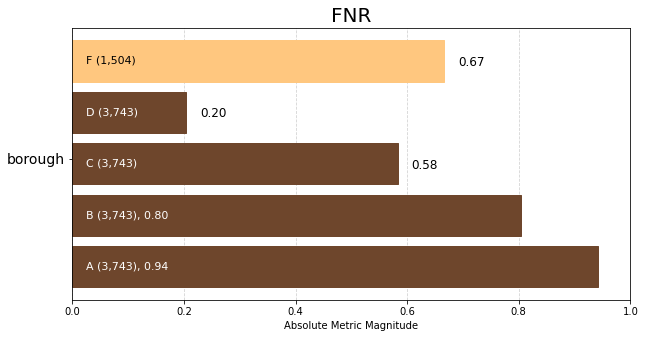

In [33]:
fnr = aqp.plot_group_metric(xtab_plot, 'fnr')

La gráfica de arriba muestra la métrica del grupo False Negative Rate (fnr), con una coloración más oscura, cuanto más muestras se tengan en el grupo de atributo.

Observando las predicciones de carga laboral para el NYPD, en relación a las quejas por "noise", predice, con mayor frecuencia, incorrectamente las predicciones asociadas al distrito "D". Por la coloración oscura de barra "D", es una de las poblaciones más grandes dentro del dataset.

### Visualizing multiple user-specified absolute group metrics across all population groups

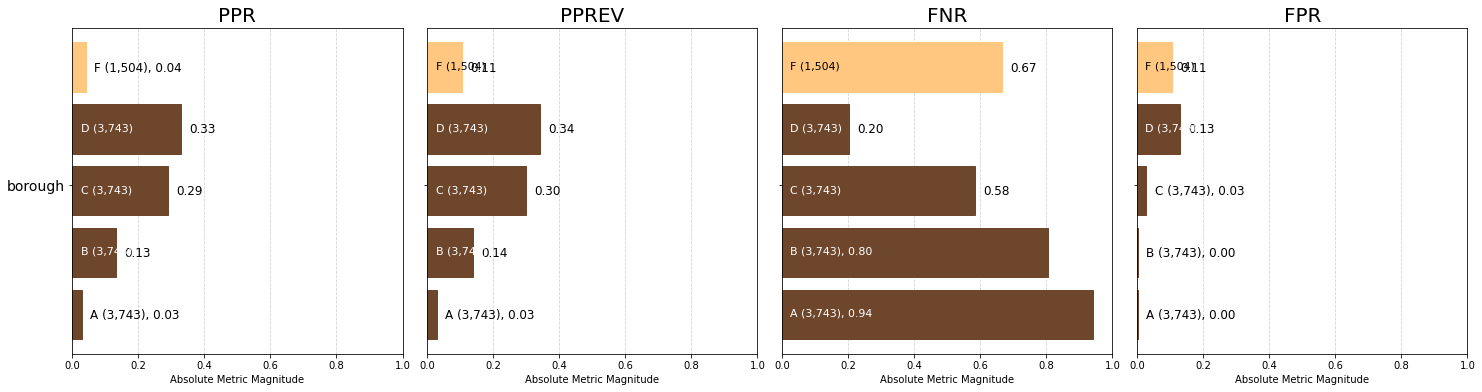

In [34]:
p = aqp.plot_group_metric_all(xtab_plot, metrics=['ppr','pprev','fnr','fpr'], ncols=4)

### Visualizing default absolute group metrics across all population groups

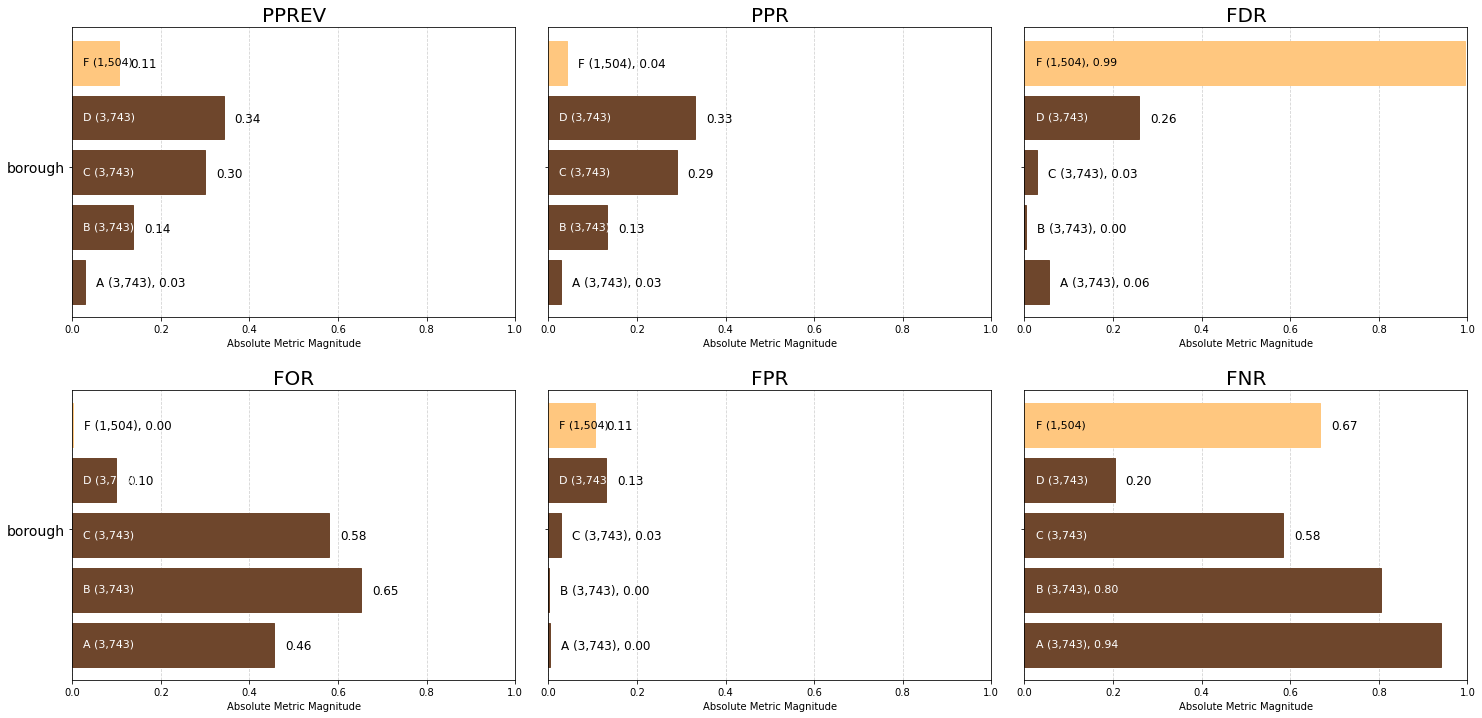

In [35]:
a = aqp.plot_group_metric_all(xtab_plot, ncols=3)

## What levels of disparity exist between population groups?

**Disparities Calculated:**

Metric -- Column Name

True Positive Rate Disparity -- ‘tpr_disprity’\
True Negative Rate -- ‘tnr_disparity’\
False Omission Rate -- ‘for_disparity’\
False Discovery Rate -- ‘fdr_disparity’\
False Positive Rate -- ‘fpr_disparity’\
False NegativeRate -- ‘fnr_disparity’\
Negative Predictive Value -- ‘npv_disparity’\
Precision Disparity -- ‘precision_disparity’\
Predicted Positive Ratio_k Disparity -- ‘ppr_disparity’\
Predicted Positive Ratio_g Disparity -- ‘pprev_disparity’

In [36]:
b = Bias()

### Disparities calculated in relation to a user-specified group for each attribute

In [37]:
majority_bdf = b.get_disparity_major_group(xtab, original_df=df)
#bdf = b.get_disparity_predefined_groups(xtab, original_df = df, ref_groups_dict={'borough':'A'}, alpha=0.05, check_significance=True, mask_significance=True)
majority_bdf.style



get_disparity_major_group()


/usr/local/lib/python3.7/site-packages/aequitas/bias.py:233: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df = df.replace(pd.np.inf, fill_divbyzero)


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,1,binary 0/1,3871,borough,A,0.058589,0.996977,0.455421,0.055046,0.003023,0.941411,0.544579,0.944954,109,3634,0.028158,0.029121,6,1655,1979,103,1758,1985,3743,20218,0.469677,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,A,A,A,A,A,A,A,A,A,A
1,1,binary 0/1,3871,borough,B,0.195420,0.998219,0.652834,0.003891,0.001781,0.804580,0.347166,0.996109,514,3229,0.132782,0.137323,2,2108,1121,512,2620,1123,3743,20218,0.699973,4.715596,4.715596,1.054135,0.070687,1.433473,0.589196,0.854654,3.335418,1.001245,0.637495,A,A,A,A,A,A,A,A,A,A
2,1,binary 0/1,3871,borough,C,0.416858,0.971756,0.580252,0.028571,0.028244,0.583142,0.419748,0.971429,1120,2623,0.289331,0.299225,32,1522,1101,1088,2610,1133,3743,20218,0.697302,10.275229,10.275229,1.028017,0.519048,1.274099,9.343925,0.619434,7.114920,0.974703,0.770776,A,A,A,A,A,A,A,A,A,A
3,1,binary 0/1,3871,borough,D,0.796468,0.870008,0.098214,0.259578,0.129992,0.203532,0.901786,0.740422,1279,2464,0.330406,0.341705,332,242,2222,947,1189,2554,3743,20218,0.317660,11.733945,11.733945,0.783554,4.715663,0.215656,43.005743,0.216199,13.594078,0.872646,1.655932,A,A,A,A,A,A,A,A,A,A
4,1,binary 0/1,3871,borough,E,nan,0.815607,0.000000,1.000000,0.184393,nan,1.000000,0.000000,690,3052,0.178249,0.184393,690,0,3052,0,0,3742,3742,20218,0.000000,6.330275,6.331967,0.000000,18.166667,0.000000,61.003474,nan,nan,0.818079,1.836281,A,A,A,A,A,A,A,A,A,A
5,1,binary 0/1,3871,borough,F,0.333333,0.894737,0.001487,0.993711,0.105263,0.666667,0.998513,0.006289,159,1345,0.041075,0.105718,158,2,1343,1,3,1501,1504,20218,0.001995,1.458716,3.630301,0.006656,18.052411,0.003265,34.824561,0.708157,5.689320,0.897450,1.833550,A,A,A,A,A,A,A,A,A,A


In [38]:
# View disparity metrics added to dataframe
majority_bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(majority_bdf) + b.list_significance(majority_bdf)].style

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,borough,A,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,borough,B,4.715596,4.715596,1.054135,0.070687,1.433473,0.589196,0.854654,3.335418,1.001245,0.637495
2,borough,C,10.275229,10.275229,1.028017,0.519048,1.274099,9.343925,0.619434,7.114920,0.974703,0.770776
3,borough,D,11.733945,11.733945,0.783554,4.715663,0.215656,43.005743,0.216199,13.594078,0.872646,1.655932
4,borough,E,6.330275,6.331967,0.000000,18.166667,0.000000,61.003474,nan,nan,0.818079,1.836281
5,borough,F,1.458716,3.630301,0.006656,18.052411,0.003265,34.824561,0.708157,5.689320,0.897450,1.833550


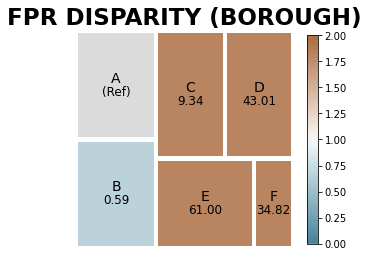

In [39]:


aqp.plot_disparity(majority_bdf, group_metric='fpr_disparity', attribute_name='borough', significance_alpha=0.05)



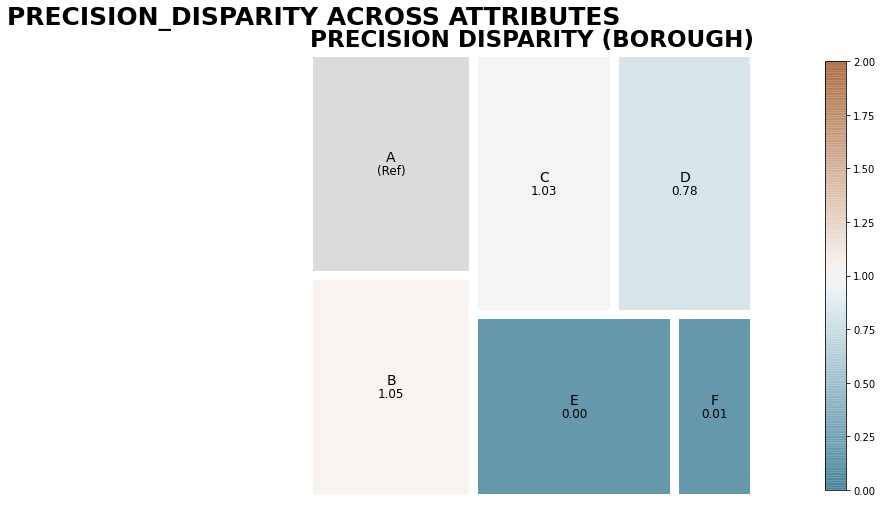

In [40]:
j = aqp.plot_disparity_all(majority_bdf, metrics=['precision_disparity'], significance_alpha=0.05)

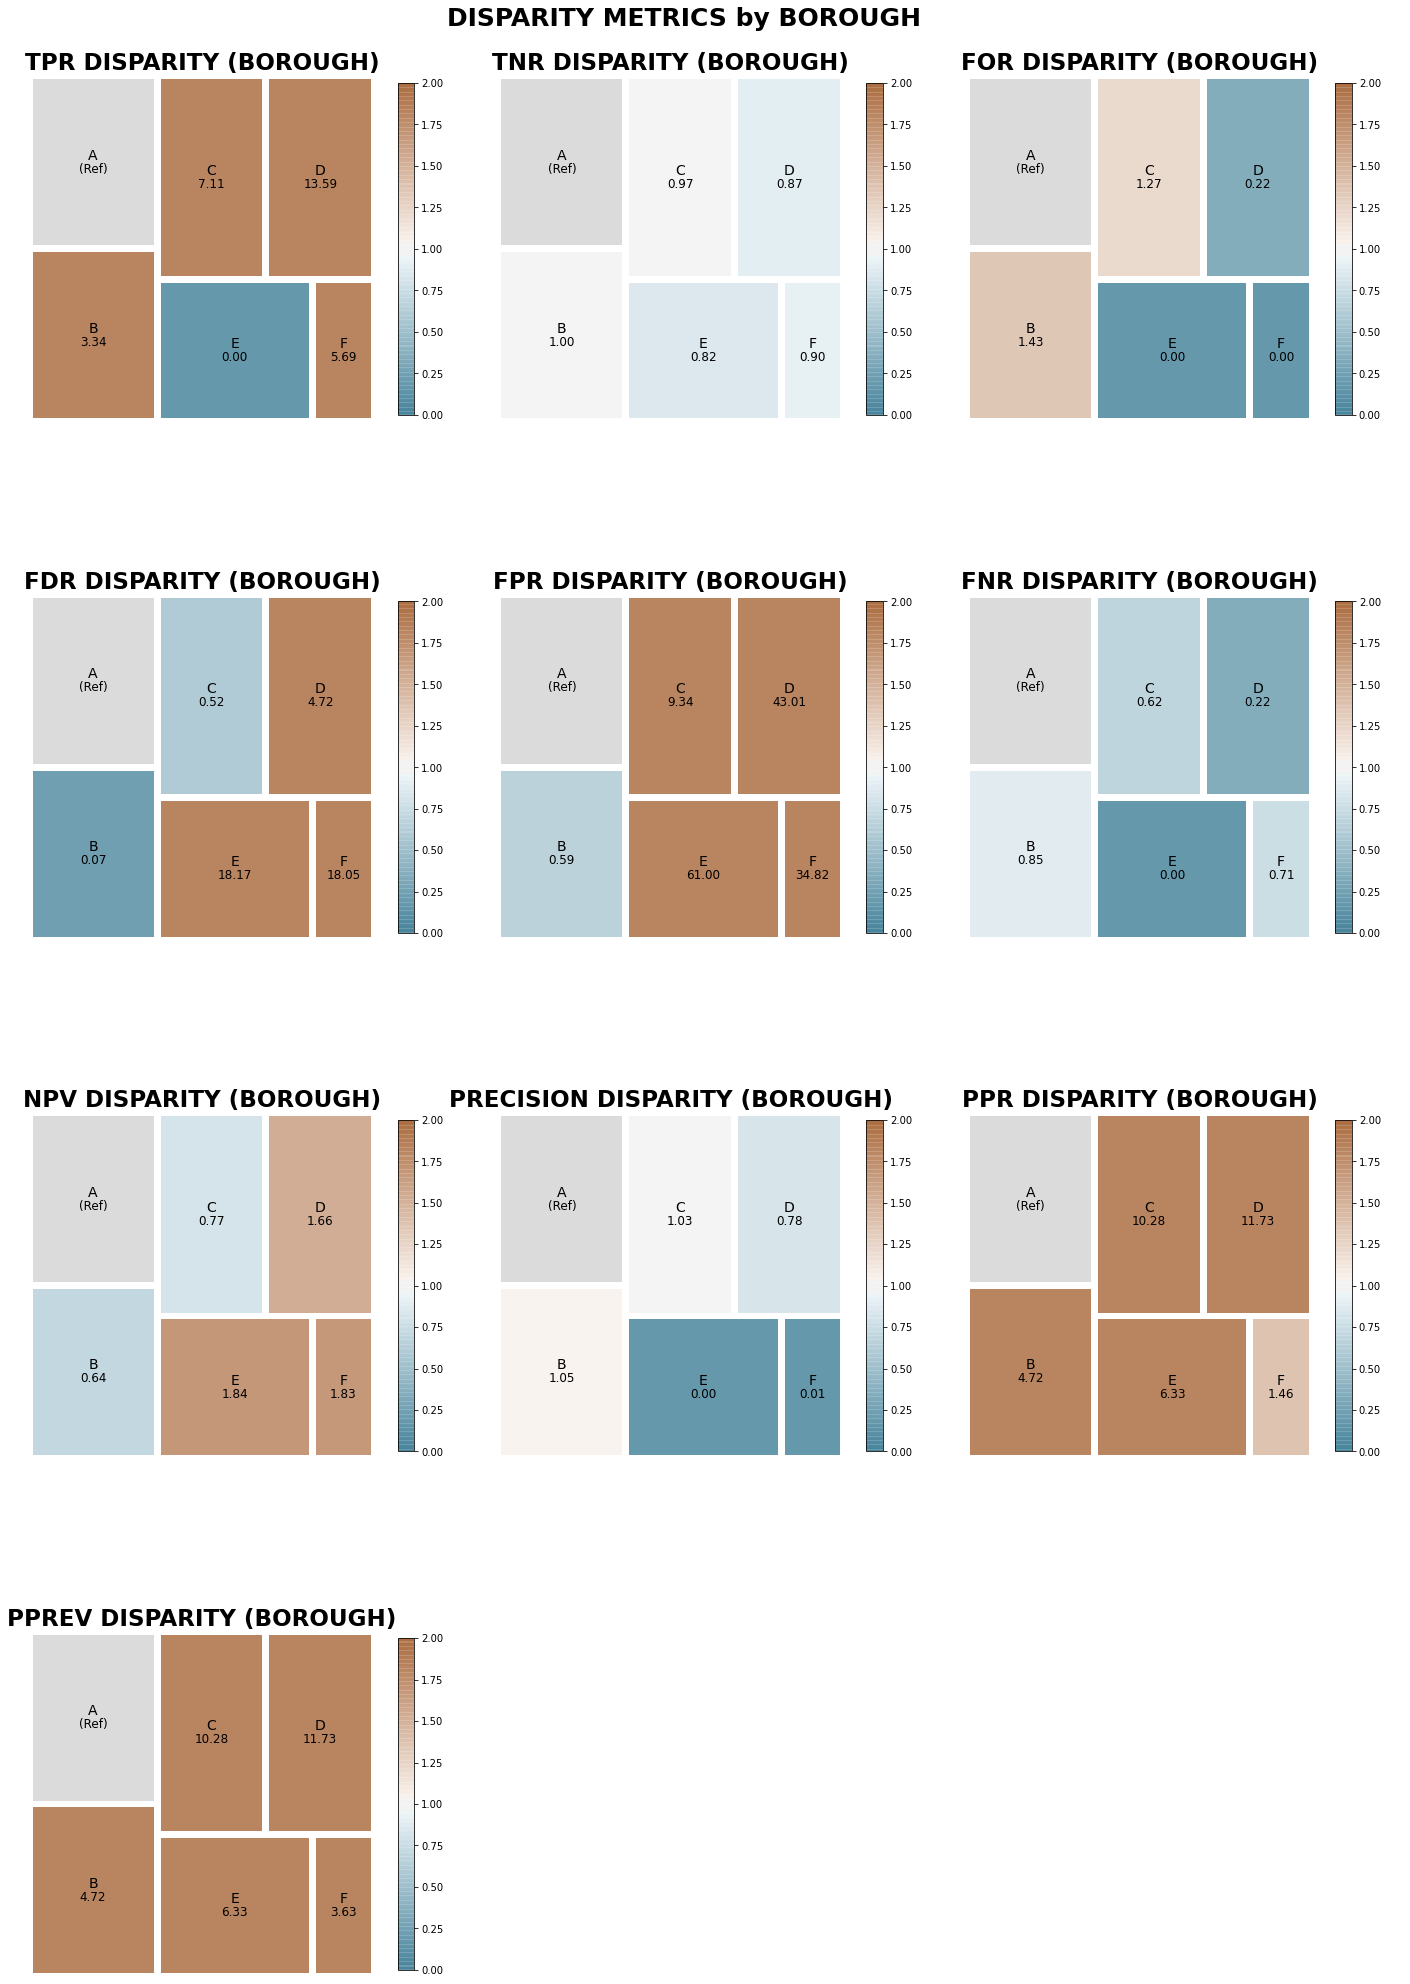

In [41]:
tm_capped = aqp.plot_disparity_all(majority_bdf, attributes=['borough'], metrics = 'all', significance_alpha=0.05)

**Evaluando el fairness de nuestro modelo**

In [42]:


f = Fairness()
fdf = f.get_group_value_fairness(majority_bdf)



/usr/local/lib/python3.7/site-packages/aequitas/fairness.py:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  self.fair_eval = lambda tau: lambda x: pd.np.nan if pd.np.isnan(x) else \
/usr/local/lib/python3.7/site-packages/aequitas/fairness.py:45: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  self.high_level_pair_eval = lambda col1, col2: lambda x: pd.np.nan if (pd.np.isnan(x[col1]) and pd.np.isnan(x[col2])) \


In [43]:
parity_determinations = f.list_parities(fdf)

In [44]:


fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_determinations].style



,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,Precision Parity,Unsupervised Fairness,Equalized Odds,TypeI Parity,NPV Parity,TypeII Parity,TNR Parity,Statistical Parity,Supervised Fairness,TPR Parity,FNR Parity,FPR Parity,FDR Parity,Impact Parity,FOR Parity
0,borough,A,0.058589,0.996977,0.455421,0.055046,0.003023,0.941411,0.544579,0.944954,0.028158,0.029121,0.469677,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,borough,B,0.195420,0.998219,0.652834,0.003891,0.001781,0.804580,0.347166,0.996109,0.132782,0.137323,0.699973,4.715596,4.715596,1.054135,0.070687,1.433473,0.589196,0.854654,3.335418,1.001245,0.637495,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False
2,borough,C,0.416858,0.971756,0.580252,0.028571,0.028244,0.583142,0.419748,0.971429,0.289331,0.299225,0.697302,10.275229,10.275229,1.028017,0.519048,1.274099,9.343925,0.619434,7.114920,0.974703,0.770776,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,borough,D,0.796468,0.870008,0.098214,0.259578,0.129992,0.203532,0.901786,0.740422,0.330406,0.341705,0.317660,11.733945,11.733945,0.783554,4.715663,0.215656,43.005743,0.216199,13.594078,0.872646,1.655932,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,borough,E,nan,0.815607,0.000000,1.000000,0.184393,nan,1.000000,0.000000,0.178249,0.184393,0.000000,6.330275,6.331967,0.000000,18.166667,0.000000,61.003474,nan,nan,0.818079,1.836281,False,False,False,False,False,False,True,False,False,nan,nan,False,False,False,False
5,borough,F,0.333333,0.894737,0.001487,0.993711,0.105263,0.666667,0.998513,0.006289,0.041075,0.105718,0.001995,1.458716,3.630301,0.006656,18.052411,0.003265,34.824561,0.708157,5.689320,0.897450,1.833550,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [45]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,borough,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


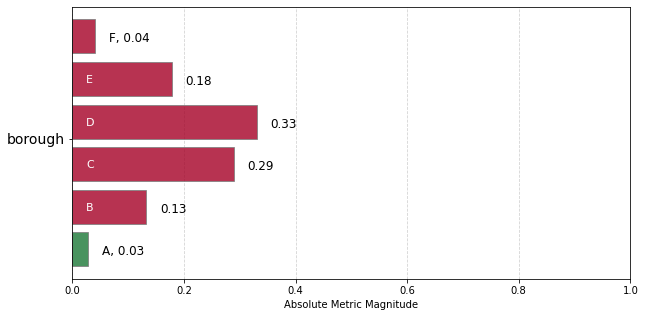

In [46]:
z = aqp.plot_fairness_group(fdf, group_metric='ppr')

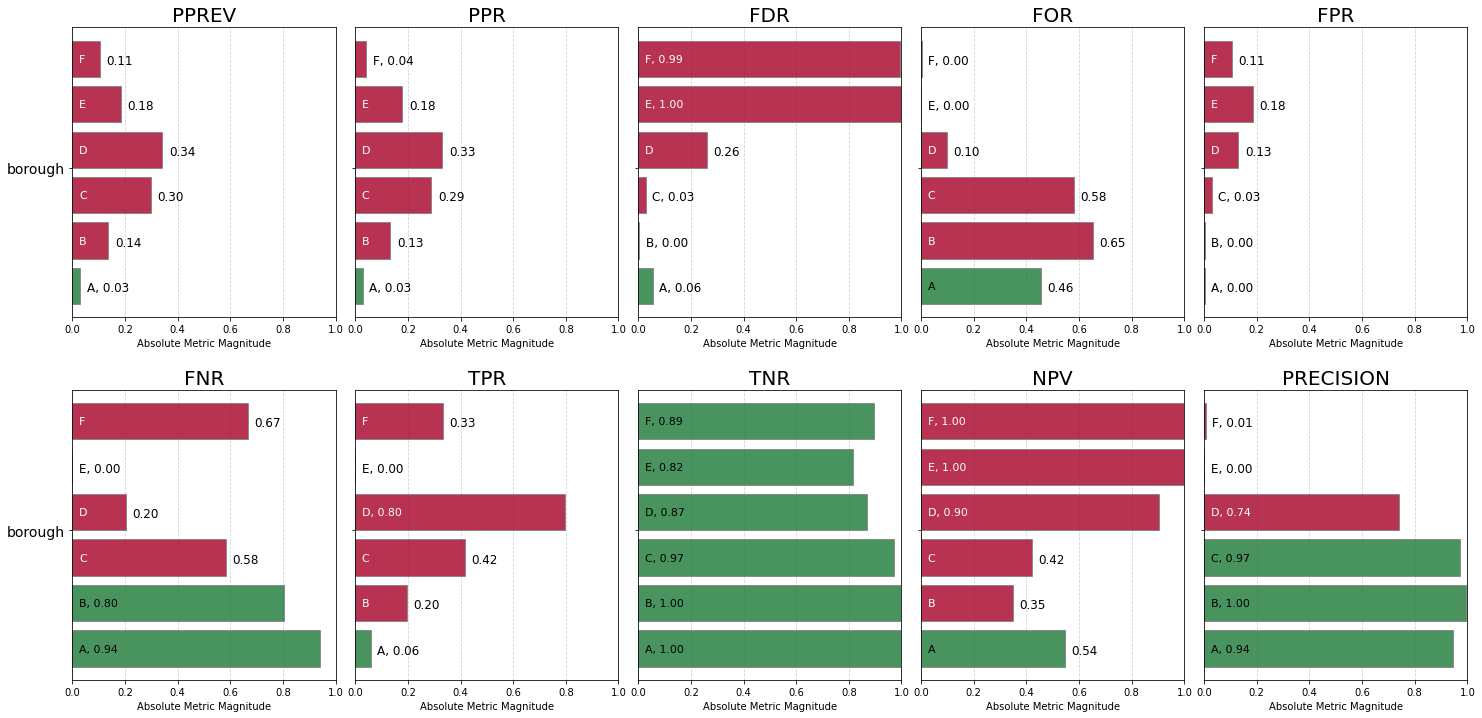

In [47]:
fg = aqp.plot_fairness_group_all(fdf, ncols=5, metrics = "all")

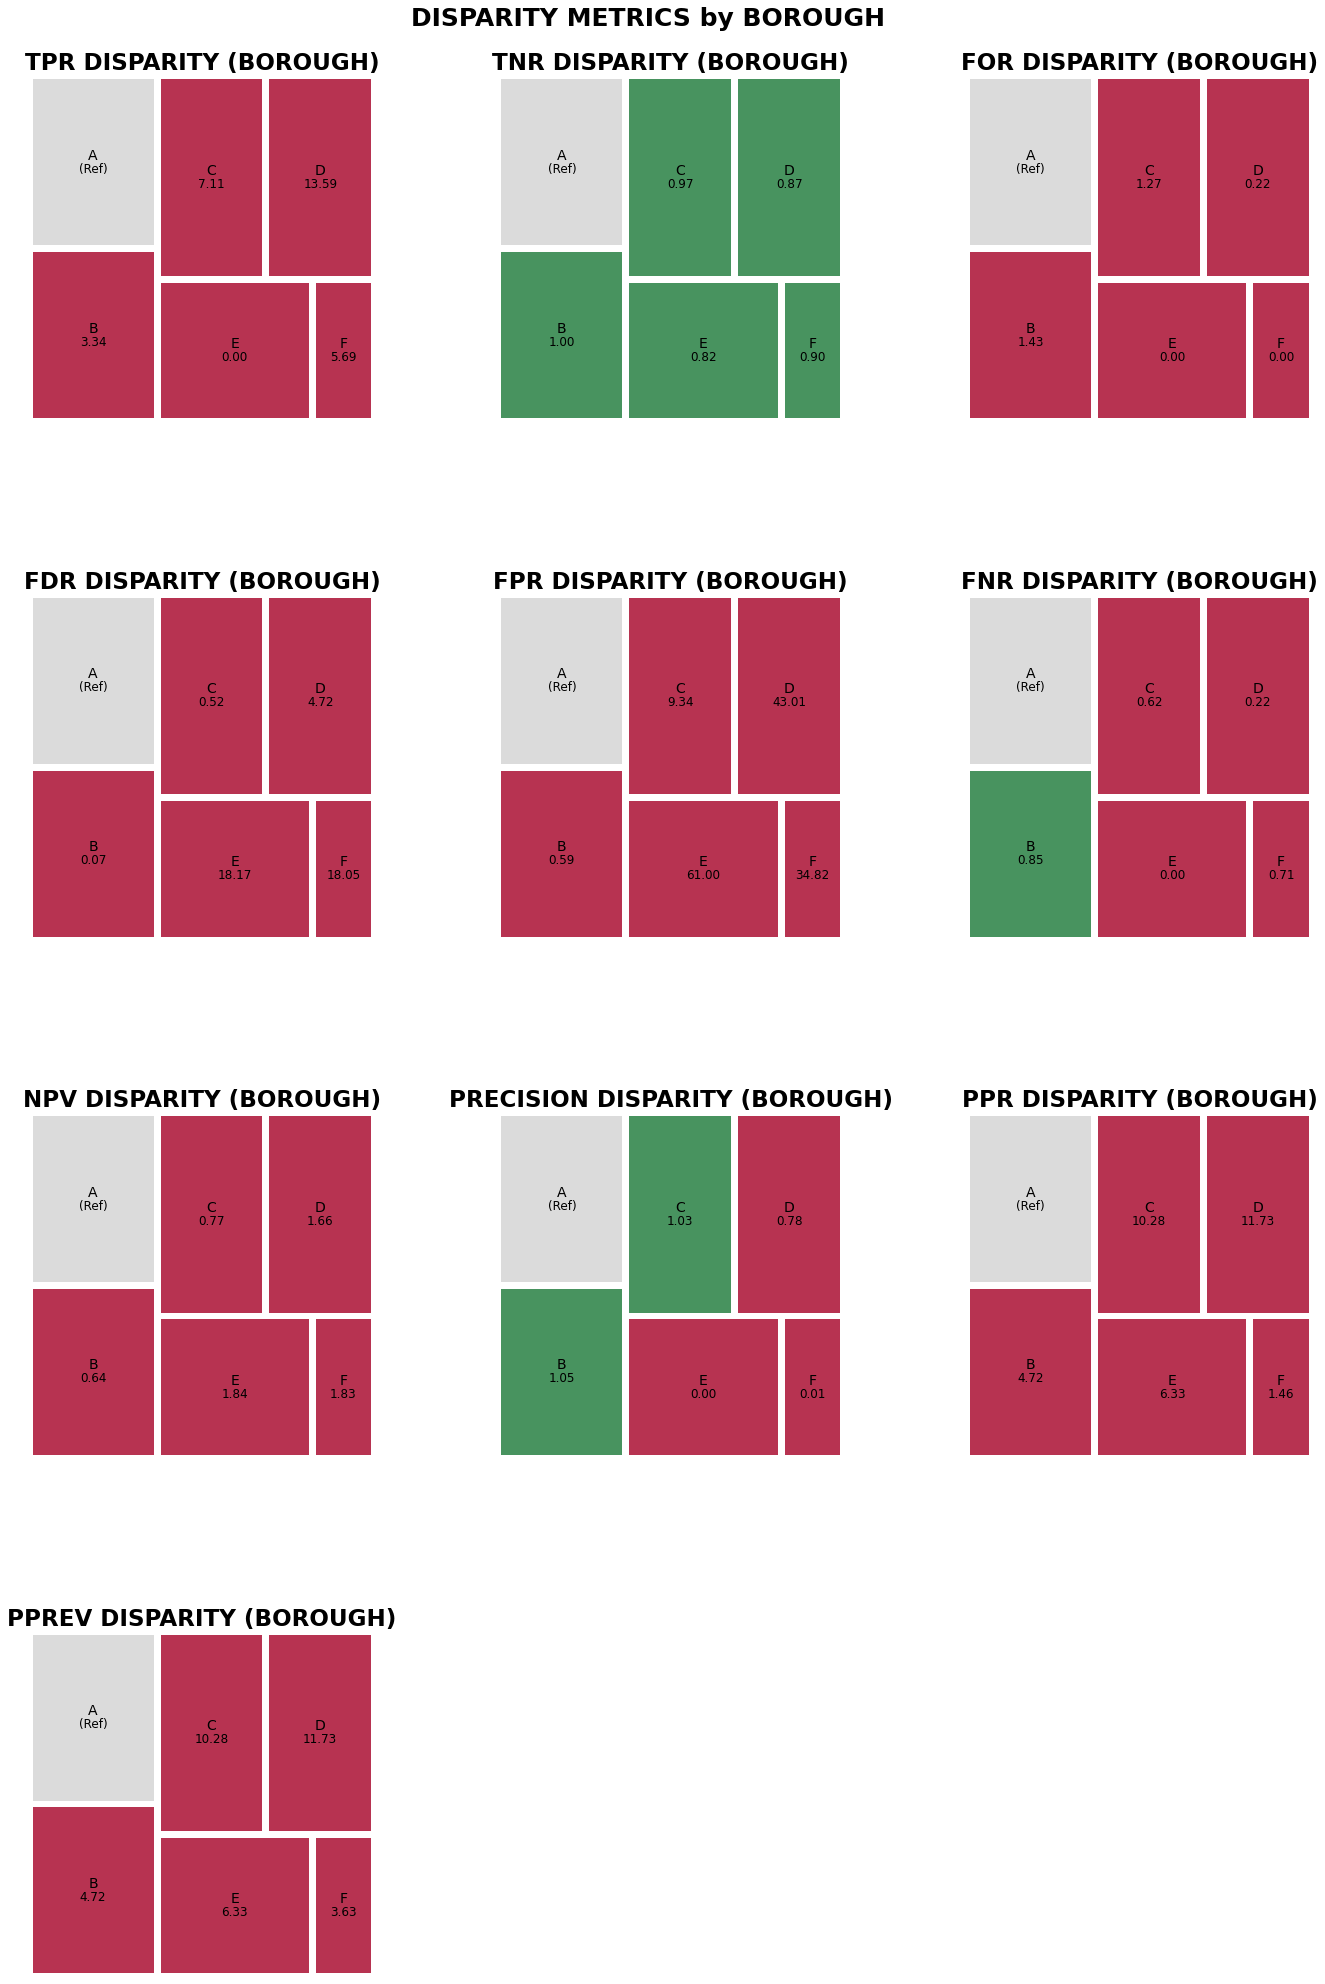

In [48]:
a_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['borough'], metrics='all', 
                                       significance_alpha=0.05)